<h1 style='text-align:center; font-weight:bold; color:orange'>Sentiment Prediction with TF-IDF Representation: A Neural Networks Approach</h1>

Reference: [XAI for sentiment](https://github.com/doscsy12/XAI_sentiment_proj/blob/main/XAI_sentiment_analysis.ipynb)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [58]:
# load dataset
df = pd.read_csv('../data/cleaned_data.csv', parse_dates=True)
df.head()

,Category,ProductName,Location,Price,OverallRating,NumberSold,TotalReview,CustomerRating,CustomerReview,Sentiment,Emotion,tokens,CleanReview
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy,"['alhamdulillah', 'berfungsi', 'packaging', 'a...",alhamdulillah berfungsi dengan baik packaging ...
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy,"['barang', 'bagus', 'respon', 'cepat', 'harga'...",barang bagus dan respon cepat harga bersaing d...
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy,"['barang', 'bagus', 'berfungsi', 'seler', 'ram...",barang bagus berfungsi dengan baik seler ramah...
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy,"['bagus', 'sesuai', 'harapan', 'penjual', 'ram...",bagus sesuai harapan penjual nya juga ramah tr...
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy,"['barang', 'bagus', 'pengemasan', 'aman', 'ber...",barang bagus pengemasan aman dapat berfungsi d...


In [59]:
# Convert sentiment to binary
df['SentimentEnc'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Prepare data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['CleanReview'].apply(lambda x: ' '.join(x)))  # Join tokens for fitting
sequences = tokenizer.texts_to_sequences(df['CleanReview'].apply(lambda x: ' '.join(x)))
MAX_SEQUENCE_LENGTH = 15  # Adjust this based on your analysis of token lengths
sequences_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, df['SentimentEnc'], test_size=0.2, random_state=42)

# Create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=MAX_SEQUENCE_LENGTH))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='binary', zero_division=0)
    recall = recall_score(y_test, predictions, average='binary', zero_division=0)
    f1 = f1_score(y_test, predictions, average='binary', zero_division=0)

    print(f'- Accuracy: {accuracy:.4f}')
    print(f'- Precision: {precision:.4f}')
    print(f'- Recall: {recall:.4f}')
    print(f'- F1 Score: {f1:.4f}')
    print("\nClassification Report:\n", classification_report(y_test, predictions))

In [60]:
# Create and train the LSTM model
lstm_model = create_lstm_model()
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the LSTM model
print("LSTM Model Evaluation:")
evaluate_model(lstm_model, X_test, y_test)

LSTM Model Evaluation:
34/34 [==============================] - 0s 3ms/step
- Accuracy: 0.7081
- Precision: 0.7078
- Recall: 0.6654
- F1 Score: 0.6859

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       562
           1       0.71      0.67      0.69       517

    accuracy                           0.71      1079
   macro avg       0.71      0.71      0.71      1079
weighted avg       0.71      0.71      0.71      1079



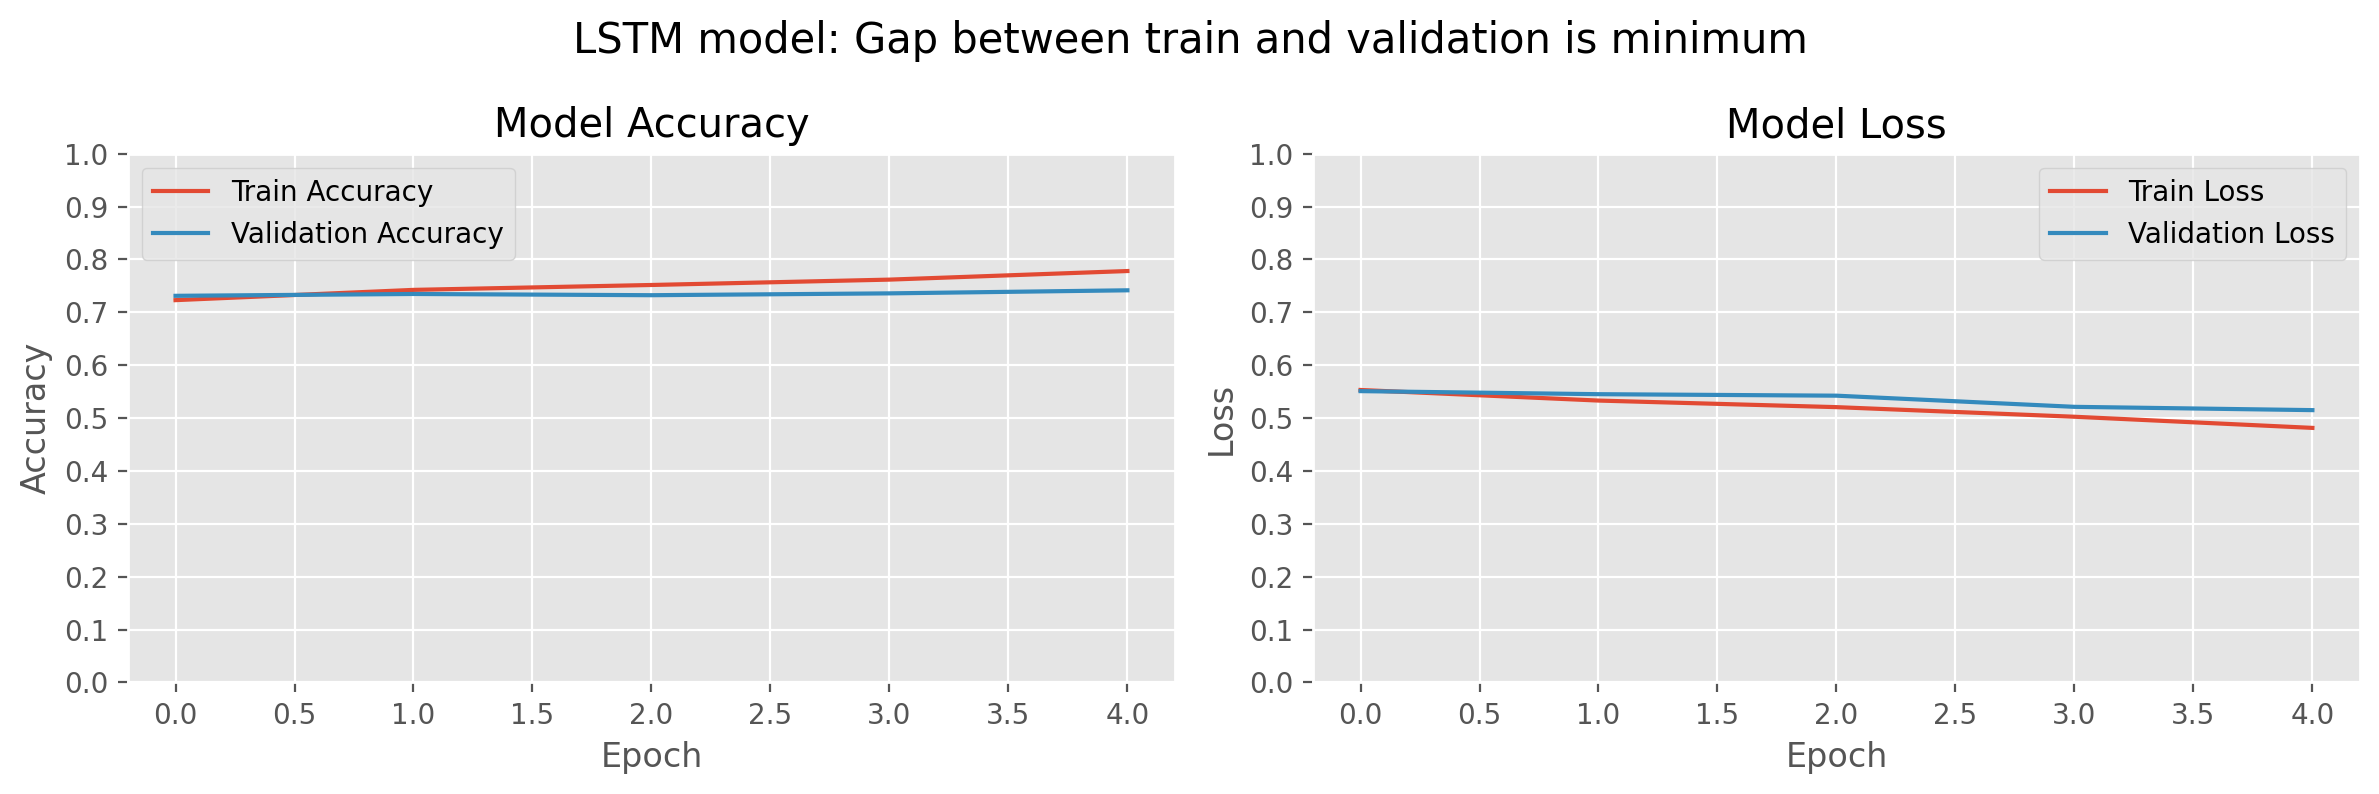

In [61]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4), dpi=200)

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('LSTM model: Gap between train and validation is minimum', size=15)
plt.tight_layout()
plt.show()

In [62]:
# create and train the Bidirectional LSTM model
bidirectional_lstm_model = create_bidirectional_lstm_model()
bidirectional_lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the Bidirectional LSTM model
print("\nBidirectional LSTM Model Evaluation:")
evaluate_model(bidirectional_lstm_model, X_test, y_test)


Bidirectional LSTM Model Evaluation:
34/34 [==============================] - 0s 4ms/step
- Accuracy: 0.6932
- Precision: 0.6816
- Recall: 0.6750
- F1 Score: 0.6783

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       562
           1       0.68      0.68      0.68       517

    accuracy                           0.69      1079
   macro avg       0.69      0.69      0.69      1079
weighted avg       0.69      0.69      0.69      1079



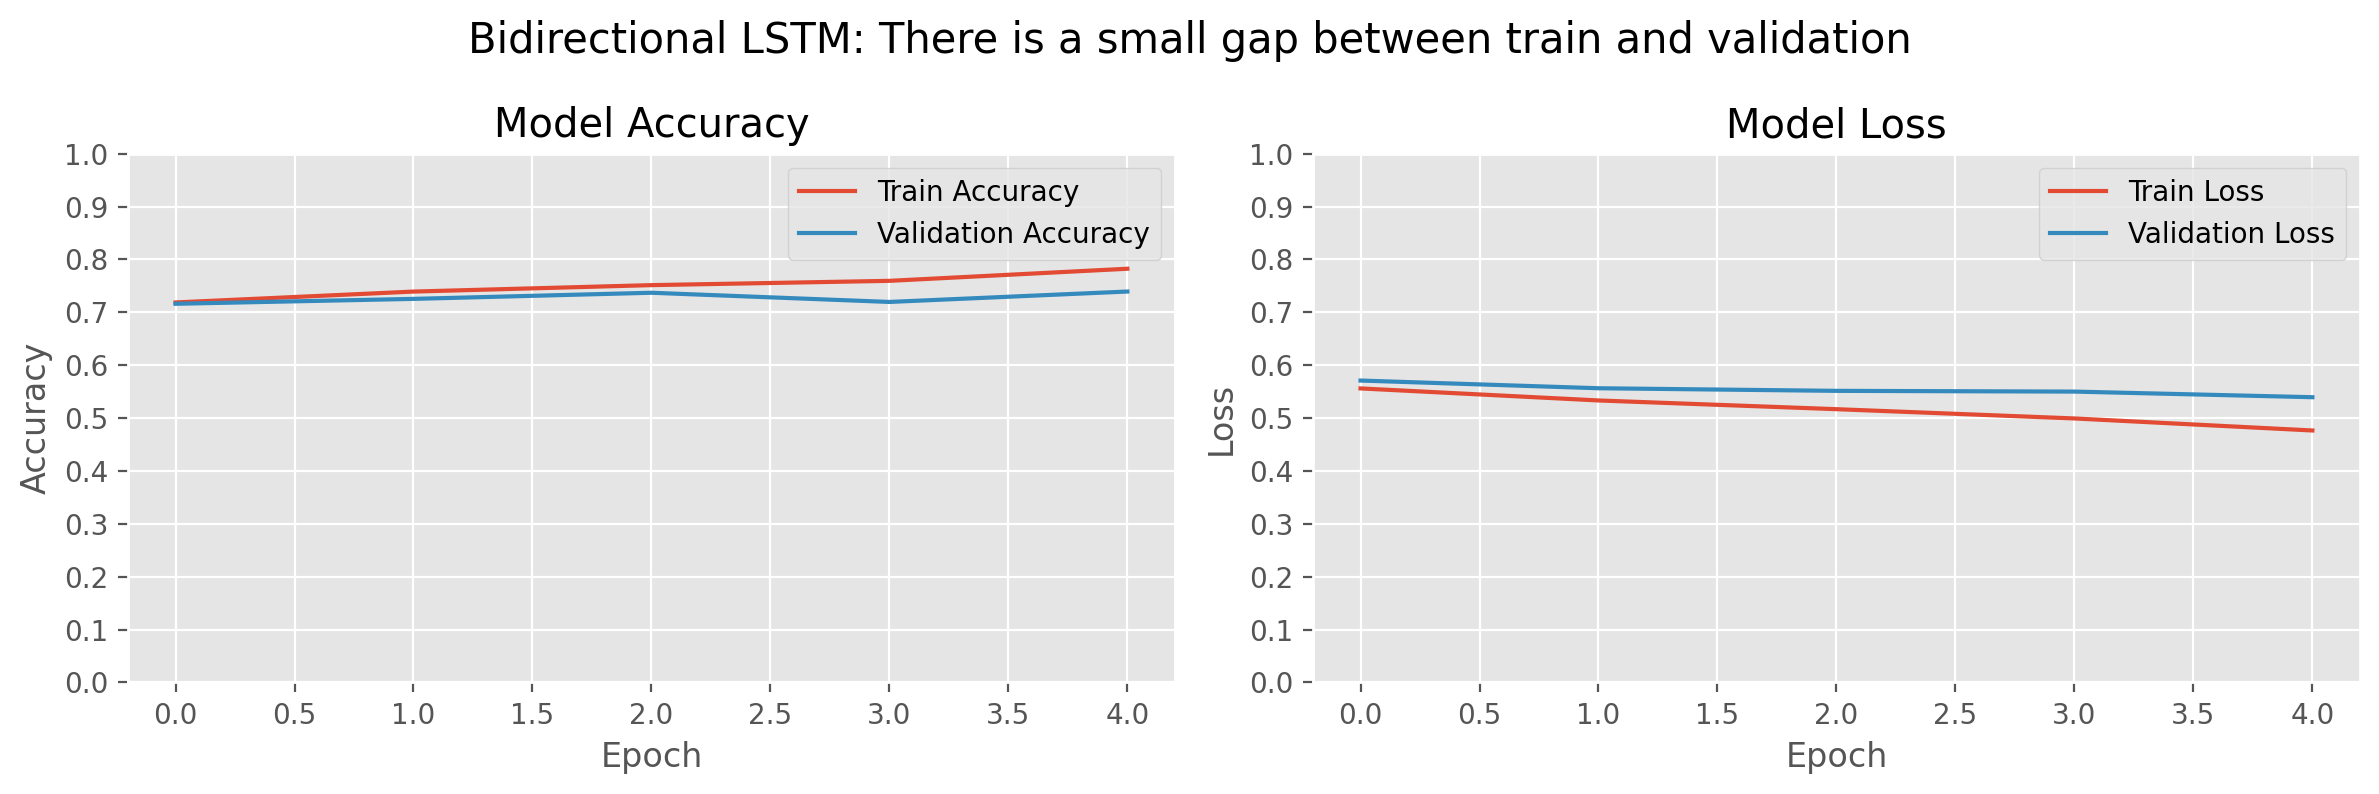

In [63]:
bidlstm_history = bidirectional_lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4), dpi=200)

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(bidlstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(bidlstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(bidlstm_history.history['loss'], label='Train Loss')
plt.plot(bidlstm_history.history['val_loss'], label='Validation Loss')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.suptitle('Bidirectional LSTM: There is a small gap between train and validation', size=15)
plt.tight_layout()
plt.show()